In [1]:
import numpy as np 
import pandas as pd 
import scanpy as sc
import os
import snapatac2 as snap
import anndata as ad
import json

# Description 

In this notebook, we will generate the gene activity matrix for all 40 samples. 

Noted that for some samples, we might need to reprocess the gadata generation process using different QC parameters.

## load CY data

### cypc data reprocessing

modify the QC param to get a new cypc gadata

In [ ]:
import json
# load data into memory, avoid modifying raw data
scdata = snap.read(save_path, backed = None)

#calculate and plot the size distribution of fragments in this dataset
snap.pl.frag_size_distr(scdata, interactive=False)
gtf_file = '/home/rsun@ZHANGroup.local/sly_data/genome/10x_genome/mfu/genes/genes.gtf'
snap.metrics.tsse(scdata, gene_anno = gtf_file)
snap.pl.tsse(scdata, interactive=False)



snap.pp.filter_cells(scdata, min_counts=3000, min_tsse=3.5, max_counts=100000)


# get gadata 

new_gtf = '/home/rsun@ZHANGroup.local/sly_data/notebook/mfu_new.gtf'
gadata = snap.pp.make_gene_matrix(scdata, gene_anno=new_gtf)

## get gene symbol 

with open('/home/rsun@ZHANGroup.local/sly_data/genome/mfu_gene_map.json', 'r') as f:
    gene_map = json.load(f)

gadata.var.loc[:,'gene_symbol'] = gadata.var.index.values 

for i, ele in enumerate(gadata.var.loc[:,'gene_symbol'].values):
    if ele in gene_map:
        gadata.var.iloc[i,:]['gene_symbol'] = gene_map[ele].capitalize()

## save gadata 
gadata.write('/home/rsun@ZHANGroup.local/sly_data/notebook/make_ga/cy_atac_data/cypc_gadata.h5ad')

### merge the cy gadata

In [23]:
path_list = os.listdir('/home/rsun@ZHANGroup.local/sly_data/notebook/make_ga/cy_atac_data')
data_list = []
for path in path_list:
    key, tmp = path.split('_')
    if tmp == 'gadata.h5ad':

        data = sc.read_h5ad(os.path.join('/home/rsun@ZHANGroup.local/sly_data/notebook/make_ga/cy_atac_data', path))
        data.obs.loc[:,'species'] = 'cy'
        data.obs.loc[:,'samples'] = key
        data.obs.loc[:,'tissues'] = key[2:]
        data_list.append(data)
print(len(data_list))
    

8


In [24]:
scdata = ad.concat(data_list)
print(scdata.shape)
scdata.obs.samples.value_counts()

(54259, 23533)


/home/rsun@ZHANGroup.local/anaconda3/envs/snapatac/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning:

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.



samples
cyct    9774
cyxq    8179
cyng    7671
cyhm    6686
cyqn    6599
cyyb    5584
cypc    5128
cybq    4638
Name: count, dtype: int64

In [25]:
scdata.write('cyga.h5ad')

... storing 'species' as categorical
... storing 'samples' as categorical
... storing 'tissues' as categorical


## load JT data

### jtpc data reprocessing

In [ ]:
scdata = snap.read('/home/rsun@ZHANGroup.local/sly_data/notebook/make_ga/jt_atac_data/jtpc_raw.h5ad', backed = None)
snap.pl.frag_size_distr(scdata, interactive=False)
gtf_file = '/home/rsun@ZHANGroup.local/sly_data/genome/10x_genome/rsi/genes/genes.gtf'
snap.metrics.tsse(scdata, gene_anno = gtf_file)
snap.pl.tsse(scdata, interactive=False) 


snap.pp.filter_cells(scdata, min_counts=2500, min_tsse=2.5, max_counts=120000)
print(scdata.shape)
# get gadata 

new_gtf = '/home/rsun@ZHANGroup.local/sly_data/notebook/rsi_new.gtf'
gadata = snap.pp.make_gene_matrix(scdata, gene_anno=new_gtf)

## get gene symbol 

with open('/home/rsun@ZHANGroup.local/sly_data/genome/rsi_gene_map.json', 'r') as f:
    gene_map = json.load(f)

gadata.var.loc[:,'gene_symbol'] = gadata.var.index.values 

for i, ele in enumerate(gadata.var.loc[:,'gene_symbol'].values):
    if ele in gene_map:
        gadata.var.iloc[i,:]['gene_symbol'] = gene_map[ele].capitalize()

## save gadata 
gadata.write(f'/home/rsun@ZHANGroup.local/sly_data/notebook/make_ga/jt_atac_data/jtpc_gadata.h5ad')

### merge the jt gadata

In [17]:
path_list = os.listdir('/home/rsun@ZHANGroup.local/sly_data/notebook/make_ga/jt_atac_data')
data_list = []
for path in path_list:
    key, tmp = path.split('_')
    if tmp == 'gadata.h5ad':

        data = sc.read_h5ad(os.path.join('/home/rsun@ZHANGroup.local/sly_data/notebook/make_ga/jt_atac_data', path))
        data.obs.loc[:,'species'] = 'jt'
        data.obs.loc[:,'samples'] = key
        data.obs.loc[:,'tissues'] = key[2:]
        data_list.append(data)
print(len(data_list))

scdata = ad.concat(data_list)
print(scdata.shape)
scdata.obs.samples.value_counts()

8
(57793, 21815)


/home/rsun@ZHANGroup.local/anaconda3/envs/snapatac/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning:

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.



samples
jtxq    9470
jtng    8976
jtct    7831
jtqn    7546
jtyb    6882
jthm    6729
jtpc    5385
jtbq    4974
Name: count, dtype: int64

In [18]:
scdata.write_h5ad('jtga.h5ad')

... storing 'species' as categorical
... storing 'samples' as categorical
... storing 'tissues' as categorical


## load QF data

### merge the qf gadta

In [15]:
path_list = os.listdir('/home/rsun@ZHANGroup.local/sly_data/notebook/make_ga/qf_atac_data')
data_list = []
for path in path_list:
    key, tmp = path.split('_')
    if tmp == 'gadata.h5ad':

        data = sc.read_h5ad(os.path.join('/home/rsun@ZHANGroup.local/sly_data/notebook/make_ga/qf_atac_data', path))
        data.obs.loc[:,'species'] = 'qf'
        data.obs.loc[:,'samples'] = key
        data.obs.loc[:,'tissues'] = key[2:]
        data_list.append(data)
print(len(data_list))

scdata = ad.concat(data_list)
print(scdata.shape)
scdata.obs.samples.value_counts()

8
(70002, 20319)


/home/rsun@ZHANGroup.local/anaconda3/envs/snapatac/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning:

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.



samples
qfng    10494
qfct    10046
qfqn     9236
qfpc     9119
qfhm     8896
qfxq     7706
qfyb     7402
qfbq     7103
Name: count, dtype: int64

In [16]:
scdata.write_h5ad('qfga.h5ad')

... storing 'species' as categorical
... storing 'samples' as categorical
... storing 'tissues' as categorical


## load T data

### merge the TDA gadata

In [36]:
path_list = os.listdir('/home/rsun@ZHANGroup.local/sly_data/notebook/make_ga/t_atac_data')
data_list = []
for path in path_list:
    key, tmp = path.split('_')
    if tmp == 'gadata.h5ad':

        data = sc.read_h5ad(os.path.join('/home/rsun@ZHANGroup.local/sly_data/notebook/make_ga/t_atac_data', path))
        data.obs.loc[:,'species'] = 't'
        data.obs.loc[:,'samples'] = key
        data.obs.loc[:,'tissues'] = key[1:]
        data_list.append(data)
print(len(data_list))

scdata = ad.concat(data_list)
print(scdata.shape)
scdata.obs.samples.value_counts()

8
(71667, 23848)


/home/rsun@ZHANGroup.local/anaconda3/envs/snapatac/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning:

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.



samples
tbq    11659
txq    10519
tyb     9249
thm     8368
tqn     8308
tpc     8061
tng     7992
tct     7511
Name: count, dtype: int64

In [37]:
scdata.write_h5ad('tga.h5ad')

... storing 'species' as categorical
... storing 'samples' as categorical
... storing 'tissues' as categorical


## load mdata

### merge the MUS gadata

In [97]:
mdata = sc.read_h5ad('/home/rsun@ZHANGroup.local/sr_project/eval_data/merge_dataset/gadata.h5ad')

tissues = mdata.obs.loc[:,'sample'].values.astype(object)
species = ['m']*mdata.shape[0]
samples = [ f'm{b}' for b in tissues]
new_obs = pd.DataFrame([tissues, species, samples]).T
new_obs.columns = ['tissues', 'species', 'samples']

tissues = np.array(tissues)
sel_id = tissues != '10x_multi'
print(sel_id.sum())
new_obs.index = mdata.obs.index

assert (new_obs.index == mdata.obs.index).all()

adata = ad.AnnData(X=mdata.X, obs=new_obs, var = mdata.var)
mdata = adata[sel_id,:]

mdata.write('mga.h5ad')

83983


/home/rsun@ZHANGroup.local/anaconda3/envs/snapatac/lib/python3.10/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.

... storing 'tissues' as categorical
/home/rsun@ZHANGroup.local/anaconda3/envs/snapatac/lib/python3.10/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.

... storing 'species' as categorical
/home/rsun@ZHANGroup.local/anaconda3/envs/snapatac/lib/python3.10/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.

... storing 'samples' as categorical


## load 5 species gadata

In [2]:
cydata = sc.read_h5ad('cyga.h5ad')
jtdata = sc.read_h5ad('jtga.h5ad')
qfdata = sc.read_h5ad('qfga.h5ad')
tdata = sc.read_h5ad('tga.h5ad')
mdata = sc.read_h5ad('mga.h5ad')
print(cydata.shape, jtdata.shape, qfdata.shape, tdata.shape, mdata.shape)

/home/rsun@ZHANGroup.local/anaconda3/envs/snapatac/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/rsun@ZHANGroup.local/anaconda3/envs/snapatac/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/rsun@ZHANGroup.local/anaconda3/envs/snapatac/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/rsun@ZHANGroup.local/anaconda3/envs/snapatac/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


(54259, 23533) (57793, 21815) (70002, 20319) (71667, 23848) (83983, 55291)


In [3]:
with open('/home/rsun@ZHANGroup.local/sly_data/genome/csp_gene_map.json', 'r') as f:
    qf_map = json.load(f) 

with open('/home/rsun@ZHANGroup.local/sly_data/genome/mfu_gene_map.json', 'r') as f:
    cy_map = json.load(f)

with open('/home/rsun@ZHANGroup.local/sly_data/genome/rsi_gene_map.json', 'r') as f:
    jt_map = json.load(f) 

with open('/home/rsun@ZHANGroup.local/sly_data/genome/tda_gene_map.json', 'r') as f:
    t_map = json.load(f)

In [4]:
tmp = qfdata.var.index.values 
count = 0
for i, ele in enumerate(tmp):
    if ele in qf_map:
        tmp[i] = qf_map[ele].capitalize()
        count += 1 
print(count)
qfdata.var.index = tmp 

tmp = cydata.var.index.values
count = 0 
for i, ele in enumerate(tmp):
    if ele in cy_map:
        tmp[i] = cy_map[ele].capitalize()
        count += 1
print(count)
cydata.var.index = tmp 

tmp = jtdata.var.index.values
count = 0
for i, ele in enumerate(tmp):
    if ele in jt_map:
        tmp[i] = jt_map[ele].capitalize()
        count += 1
print(count)
jtdata.var.index = tmp 

tmp = tdata.var.index.values
count = 0
for i, ele in enumerate(tmp):
    if ele in t_map:
        tmp[i] = t_map[ele].capitalize()
        count += 1
print(count)
tdata.var.index = tmp

13109
23533
21815
23848


In [5]:
def drop_duplicate(adata):
    duplicate_genes = adata.var.index[adata.var.index.duplicated()].unique()

    print(f"重复的基因有：{len(duplicate_genes)}")

    adata = adata[:, ~adata.var.index.duplicated(keep='first')].copy()
    return adata

cydata = drop_duplicate(cydata)
jtdata = drop_duplicate(jtdata)
qfdata = drop_duplicate(qfdata)
tdata = drop_duplicate(tdata)
mdata = drop_duplicate(mdata)

重复的基因有：315


/home/rsun@ZHANGroup.local/anaconda3/envs/snapatac/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


重复的基因有：280


/home/rsun@ZHANGroup.local/anaconda3/envs/snapatac/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


重复的基因有：0


/home/rsun@ZHANGroup.local/anaconda3/envs/snapatac/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


重复的基因有：1949


/home/rsun@ZHANGroup.local/anaconda3/envs/snapatac/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


重复的基因有：0


In [6]:
mutual_gene = cydata.var.index.values
mutual_gene = np.intersect1d(mutual_gene, qfdata.var.index.values )
print(mutual_gene.shape)
mutual_gene = np.intersect1d(mutual_gene, jtdata.var.index.values )
print(mutual_gene.shape)
mutual_gene = np.intersect1d(mutual_gene, tdata.var.index.values)
print(mutual_gene.shape)
mutual_gene = np.intersect1d(mutual_gene, mdata.var.index.values)
print(mutual_gene.shape)

(11360,)
(10757,)
(10170,)
(10155,)


### data concat

In [7]:
cydata.obs.index = 'cy-' + cydata.obs.index
jtdata.obs.index = 'jt-' + jtdata.obs.index
qfdata.obs.index = 'qf-' + qfdata.obs.index
tdata.obs.index = 't-' + tdata.obs.index

In [8]:
cydata = cydata[:, mutual_gene]
jtdata = jtdata[:, mutual_gene]
qfdata = qfdata[:, mutual_gene]
tdata = tdata[:, mutual_gene]
mdata = mdata[:,mutual_gene]

scdata = ad.concat([cydata, jtdata, qfdata, tdata, mdata])
scdata

/home/rsun@ZHANGroup.local/anaconda3/envs/snapatac/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 337704 × 10155
    obs: 'species', 'samples', 'tissues'

In [10]:
scdata.var = mdata.var

/home/rsun@ZHANGroup.local/anaconda3/envs/snapatac/lib/python3.10/site-packages/anndata/_core/anndata.py:797: ImplicitModificationWarning: Trying to modify index of attribute `.var` of view, initializing view as actual.
  getattr(self, attr).index = value


In [11]:
scdata.write('gadata_all.h5ad')

### gadata processing 

- QC
- PCA and UMAP visualization

In [12]:
sc.pp.filter_cells(scdata, min_genes = 200)
print(scdata.shape)
sc.pp.filter_genes(scdata, min_cells = 30)
print(scdata.shape)

scdata.layers['count'] = scdata.X

sc.pp.normalize_total(scdata, target_sum = 1e4)
sc.pp.log1p(scdata) 

/home/rsun@ZHANGroup.local/anaconda3/envs/snapatac/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/rsun@ZHANGroup.local/anaconda3/envs/snapatac/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


(337691, 10155)


/home/rsun@ZHANGroup.local/anaconda3/envs/snapatac/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


(337691, 10155)


In [13]:
scdata.raw = scdata 

sc.pp.highly_variable_genes(scdata, n_top_genes=3000)
scdata = scdata[:, scdata.var.highly_variable]
scdata

View of AnnData object with n_obs × n_vars = 337691 × 3000
    obs: 'species', 'samples', 'tissues', 'n_genes'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    layers: 'count'

/home/rsun@ZHANGroup.local/anaconda3/envs/snapatac/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca
/home/rsun@ZHANGroup.local/anaconda3/envs/snapatac/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


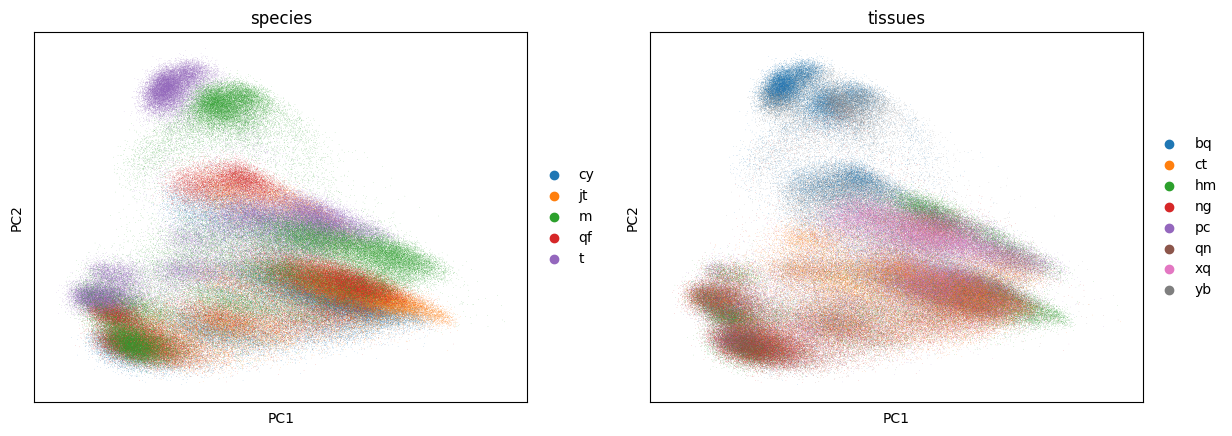

In [14]:
sc.tl.pca(scdata)
sc.pl.pca(scdata, color = ['species', 'tissues'])

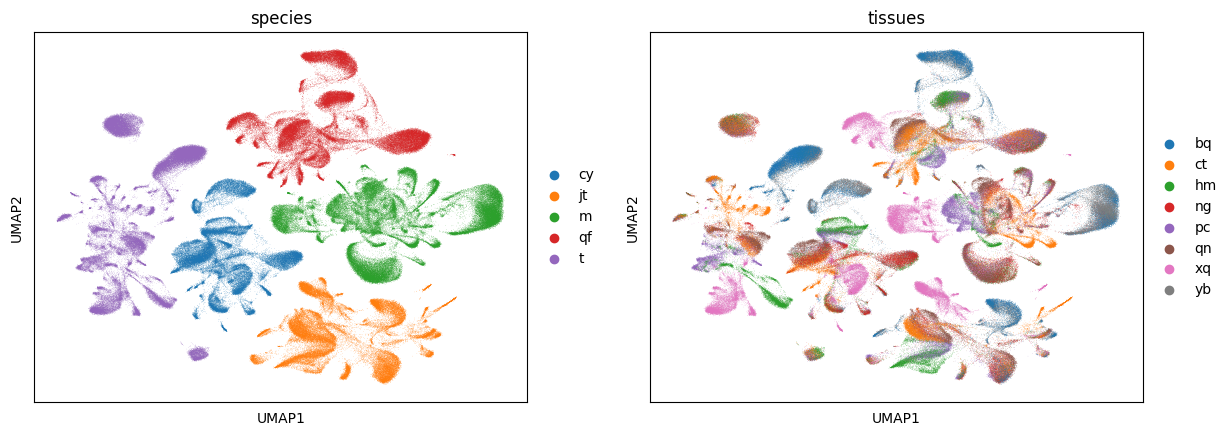

In [15]:
sc.pp.neighbors(scdata)
sc.tl.umap(scdata, min_dist = 0.5)
sc.pl.umap(scdata, color = ['species', 'tissues'])

### gadata save

In [16]:
scdata.write('gadata_pca.h5ad')